<a href="https://colab.research.google.com/github/baker371/case_study/blob/main/Qn_1/Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Installations, importing Libraries and data




In [1]:
%%capture
!pip install pycaret

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pycaret
from   pycaret.classification import *
np.random.seed(42)
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Loading Dataset
data = pd.read_csv('gdrive/MyDrive/Data/data1.csv')
data.head()

,ID,Zone,County,Area,Gender,Age,Accounts Product Family,At Risk Rate,Disabled Rate,Repayment Speed,Total Amount Paid,Total Amount Post Upfront Amount
0,NaN,NaN,Western,Ibanda,MALE,56.0,Home 60,NaN,0.0,0.0000,60000.0,0.0
1,2036051.0,NaN,Central,Arua,MALE,35.0,Pro,NaN,0.0,1.0763,191400.0,176400.0
2,5826367.0,NaN,Western,Kabale,MALE,25.0,Boom,NaN,0.0,1.0801,277000.0,252000.0
3,2427052.0,NaN,Western,Kabale,MALE,30.0,Pro,NaN,0.0,1.0794,191400.0,176400.0
4,2583052.0,NaN,Northern,Pader,MALE,74.0,Pro,NaN,0.0,1.0801,191400.0,176400.0


In [4]:
data.tail()

,ID,Zone,County,Area,Gender,Age,Accounts Product Family,At Risk Rate,Disabled Rate,Repayment Speed,Total Amount Paid,Total Amount Post Upfront Amount
51338,6594469.0,NaN,Northern,Pader,MALE,38.0,Boom,0.5,1.0,0.1397,59800.0,34800.0
51339,29939832.0,NaN,Central,Luwero,MALE,47.0,Home 60,0.5,1.0,0.2055,197600.0,178600.0
51340,67326405.0,NaN,Eastern,Mbale,MALE,25.0,Home 120,0.5,1.0,0.1675,177250.0,108250.0
51341,32076424.0,NaN,Central,Luwero,MALE,32.0,Home 60,0.5,1.0,0.3285,425800.0,406800.0
51342,NaN,NaN,Western,Kabale,FEMALE,40.0,Home 60,0.5,1.0,0.0080,46000.0,8000.0


In [5]:
data.shape

(51343, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51343 entries, 0 to 51342
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                49862 non-null  float64
 1   Zone                              0 non-null      float64
 2   County                            51334 non-null  object 
 3   Area                              51334 non-null  object 
 4   Gender                            51335 non-null  object 
 5   Age                               51339 non-null  float64
 6   Accounts Product Family           51340 non-null  object 
 7   At Risk Rate                      51309 non-null  float64
 8   Disabled Rate                     51343 non-null  float64
 9   Repayment Speed                   51342 non-null  float64
 10  Total Amount Paid                 51343 non-null  float64
 11  Total Amount Post Upfront Amount  51343 non-null  float64
dtypes: f

In [7]:
# Dropping the index column and empty columns

data = data.drop(['ID','Zone','At Risk Rate'], axis=1)

# Remove Rows with missing data
df = data.dropna()

df.shape

(51317, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51317 entries, 0 to 51342
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   County                            51317 non-null  object 
 1   Area                              51317 non-null  object 
 2   Gender                            51317 non-null  object 
 3   Age                               51317 non-null  float64
 4   Accounts Product Family           51317 non-null  object 
 5   Disabled Rate                     51317 non-null  float64
 6   Repayment Speed                   51317 non-null  float64
 7   Total Amount Paid                 51317 non-null  float64
 8   Total Amount Post Upfront Amount  51317 non-null  float64
dtypes: float64(5), object(4)
memory usage: 3.9+ MB


In [9]:
df.head()

,County,Area,Gender,Age,Accounts Product Family,Disabled Rate,Repayment Speed,Total Amount Paid,Total Amount Post Upfront Amount
0,Western,Ibanda,MALE,56.0,Home 60,0.0,0.0000,60000.0,0.0
1,Central,Arua,MALE,35.0,Pro,0.0,1.0763,191400.0,176400.0
2,Western,Kabale,MALE,25.0,Boom,0.0,1.0801,277000.0,252000.0
3,Western,Kabale,MALE,30.0,Pro,0.0,1.0794,191400.0,176400.0
4,Northern,Pader,MALE,74.0,Pro,0.0,1.0801,191400.0,176400.0


In [10]:
df.describe()

,Age,Disabled Rate,Repayment Speed,Total Amount Paid,Total Amount Post Upfront Amount
count,51317.000000,51317.000000,51317.000000,5.131700e+04,5.131700e+04
mean,35.976148,0.999497,0.372145,1.802520e+05,1.554315e+05
std,11.042839,0.022225,0.312652,1.679546e+05,1.630243e+05
min,2.000000,0.000000,0.000000,1.200000e+04,0.000000e+00
25%,28.000000,1.000000,0.101900,5.470000e+04,3.150000e+04
50%,34.000000,1.000000,0.283300,1.242500e+05,1.000000e+05
75%,42.000000,1.000000,0.605600,2.531000e+05,2.267500e+05
max,100.000000,1.000000,2.933300,2.994534e+06,2.844534e+06


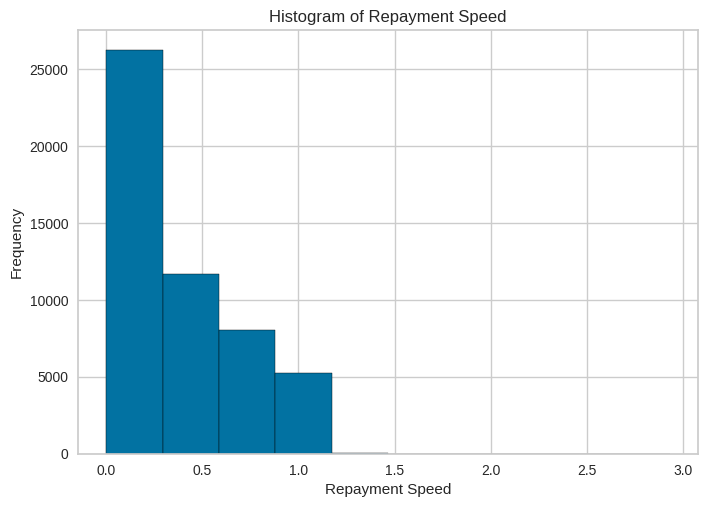

In [11]:
# Plotting the histogram
plt.hist(df['Repayment Speed'], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Repayment Speed')
plt.ylabel('Frequency')
plt.title('Histogram of Repayment Speed')

# Displaying the plot
plt.show()

In [12]:
# Following the histogram, Create the 'Unlocked' column based on 'Repayment Speed', it will be labeled unlocked (1) if the repayment speed is 70% and above
df['Unlocked'] = df['Repayment Speed'].apply(lambda x: 0 if x < 0.7 else 1)
df.head()

,County,Area,Gender,Age,Accounts Product Family,Disabled Rate,Repayment Speed,Total Amount Paid,Total Amount Post Upfront Amount,Unlocked
0,Western,Ibanda,MALE,56.0,Home 60,0.0,0.0000,60000.0,0.0,0
1,Central,Arua,MALE,35.0,Pro,0.0,1.0763,191400.0,176400.0,1
2,Western,Kabale,MALE,25.0,Boom,0.0,1.0801,277000.0,252000.0,1
3,Western,Kabale,MALE,30.0,Pro,0.0,1.0794,191400.0,176400.0,1
4,Northern,Pader,MALE,74.0,Pro,0.0,1.0801,191400.0,176400.0,1


<Axes: ylabel='Density'>

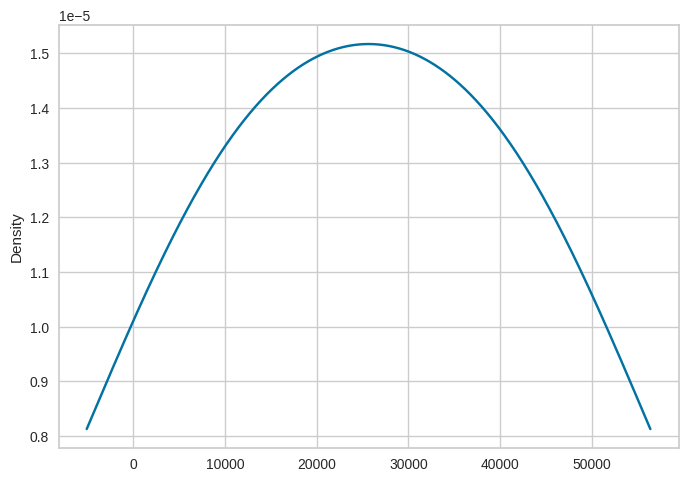

In [13]:
# Target/Dependent variable is the Unlocked Column. It shows if someone the product will be unlocked (1) or not (0)

df.Unlocked.value_counts().plot(kind= "density")

The Unlocked column has a normal distribution which is good for the prediction, data is not skewed in any way.

<Axes: >

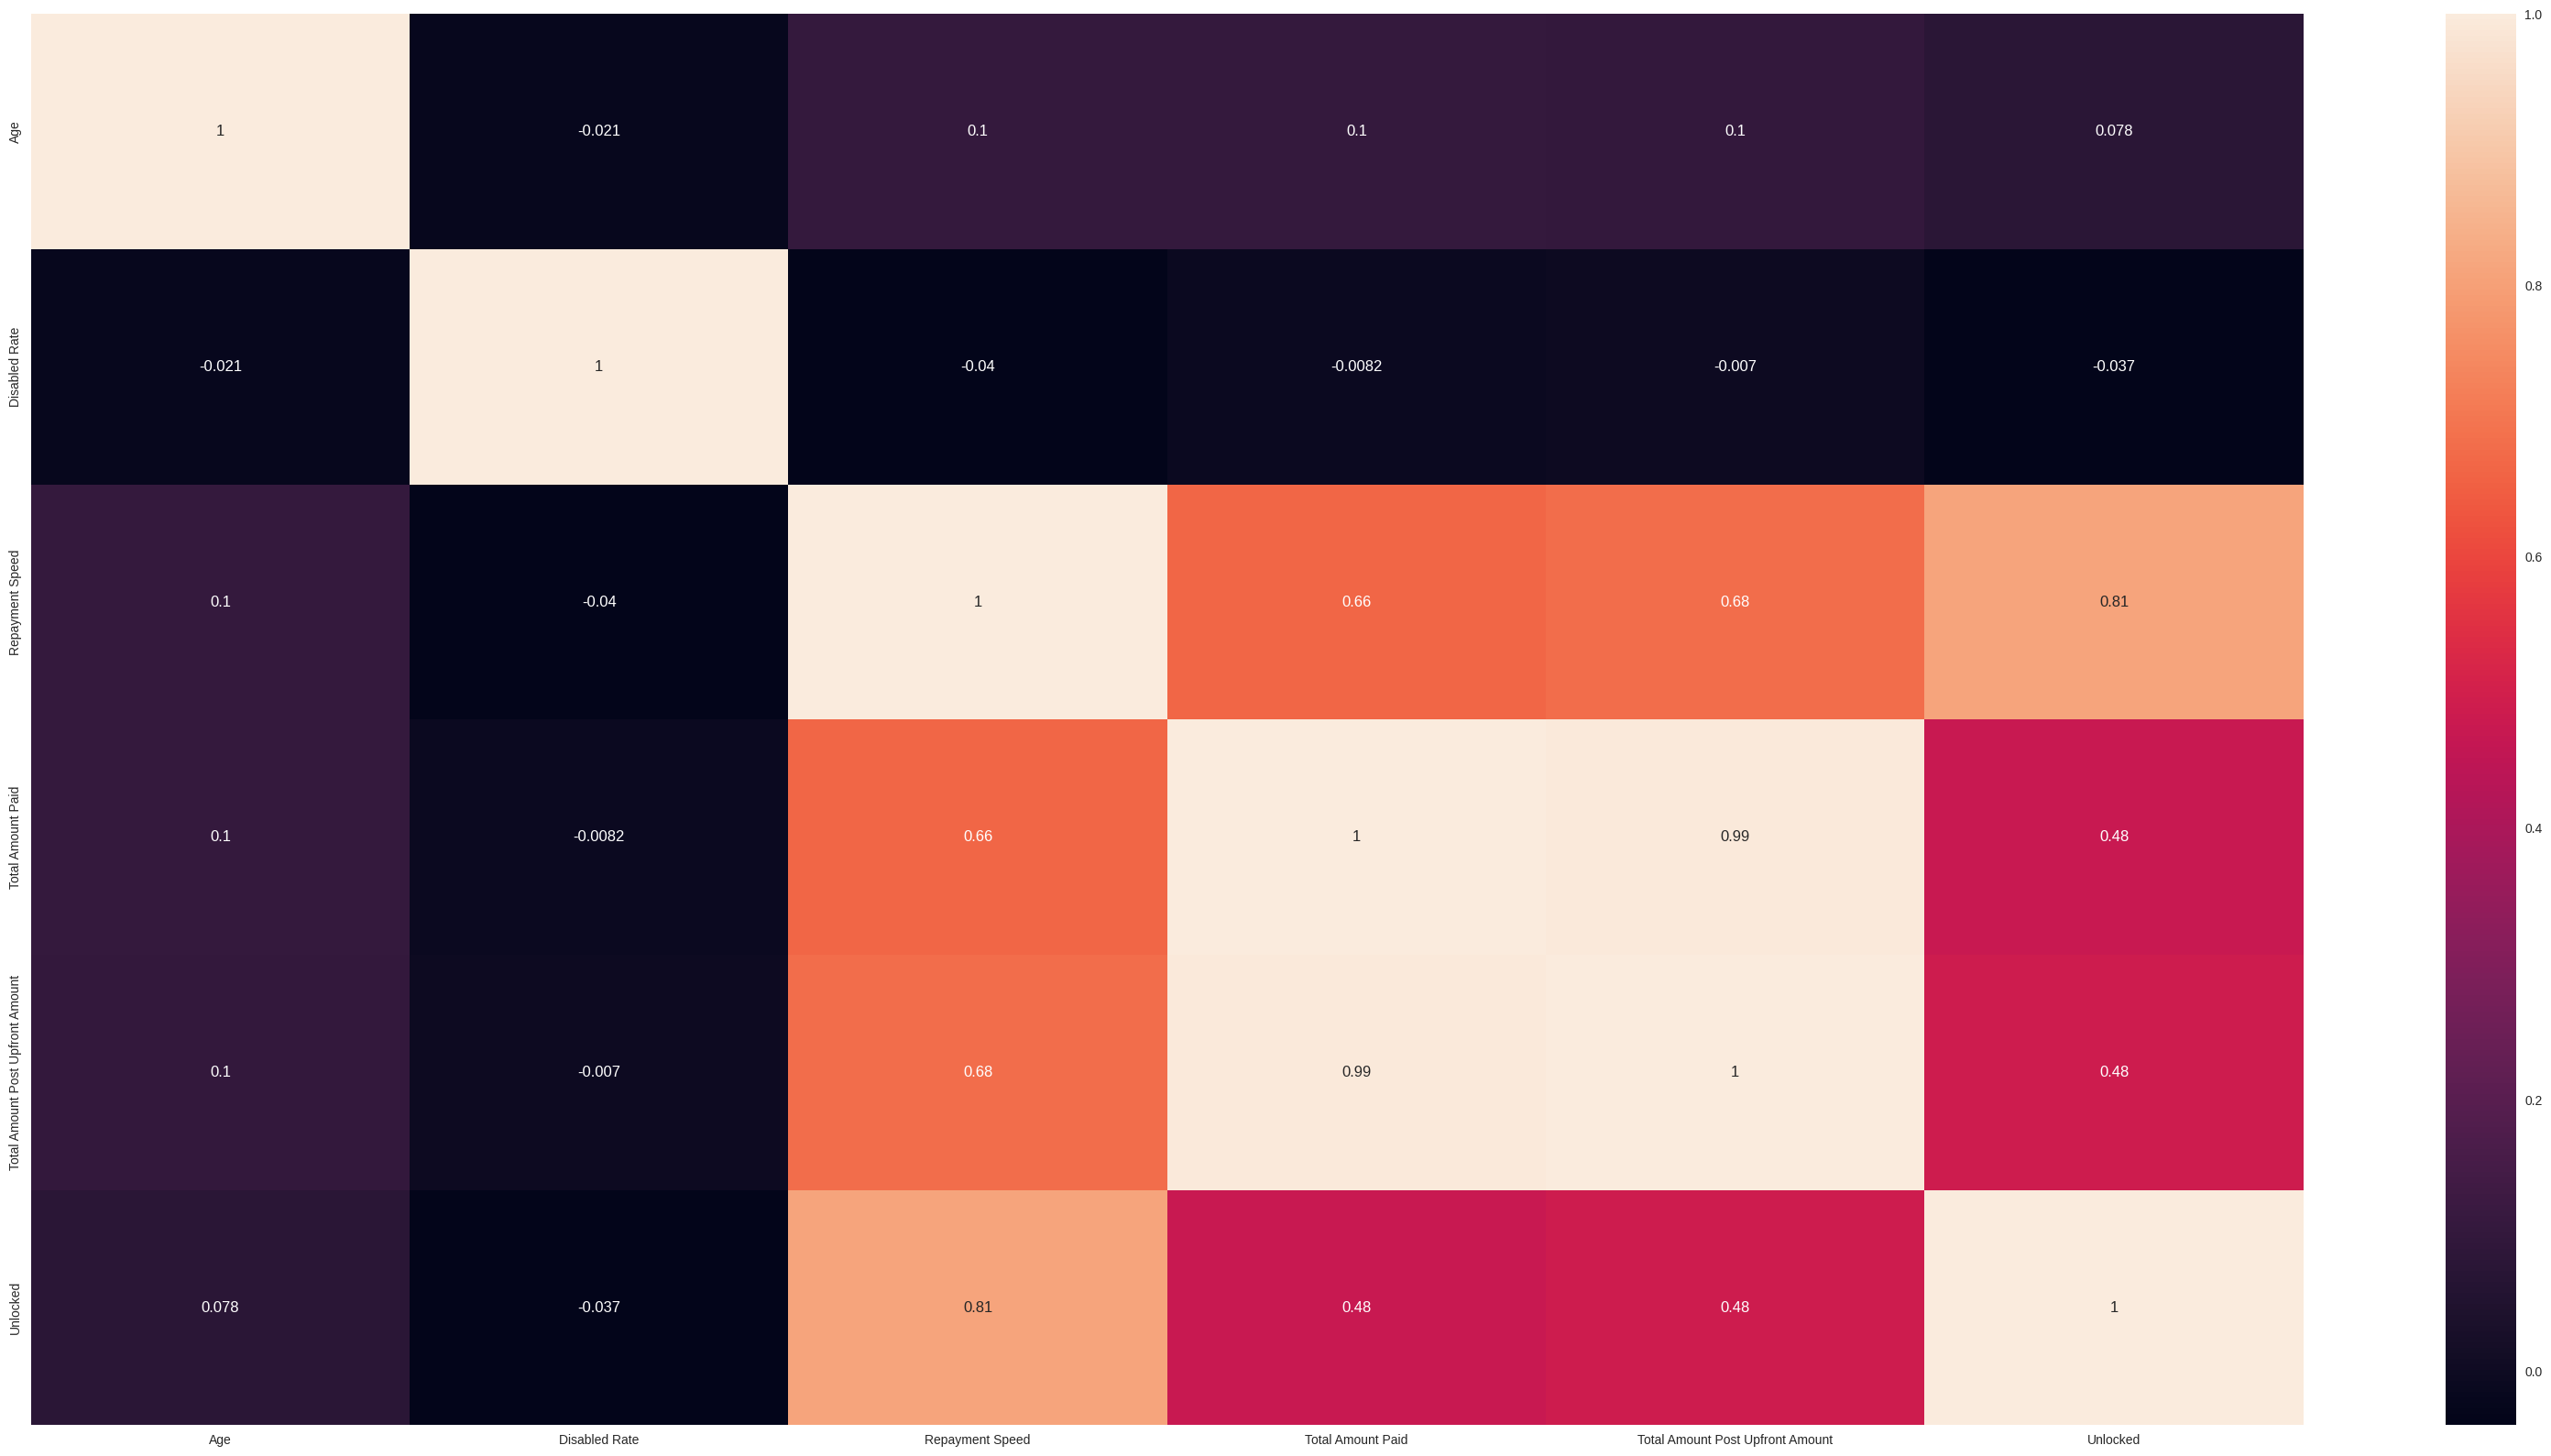

In [14]:
# Correlation Heatmap to show the relationship between the different features
fig, ax = plt.subplots(figsize = (40, 20))

corr = df.corr()
sns.heatmap(corr, annot = True)

## Univariate Analysis

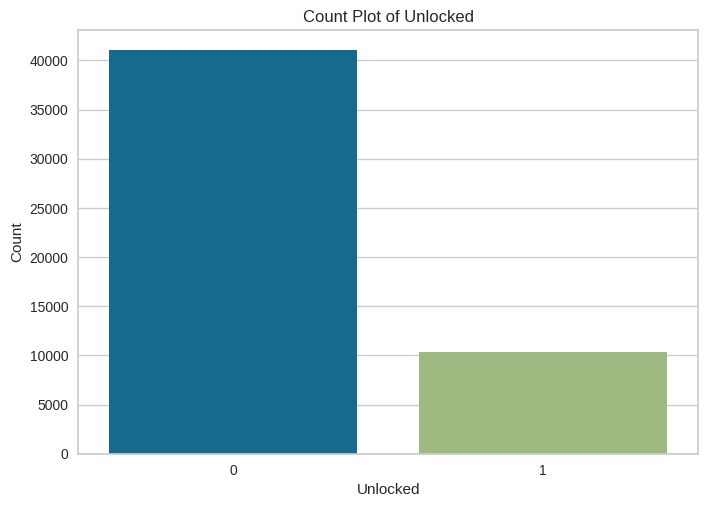

In [15]:
# Create the count plot
sns.countplot(x='Unlocked', data=df)

# Adding labels and title
plt.xlabel('Unlocked')
plt.ylabel('Count')
plt.title('Count Plot of Unlocked')

# Displaying the plot
plt.show()

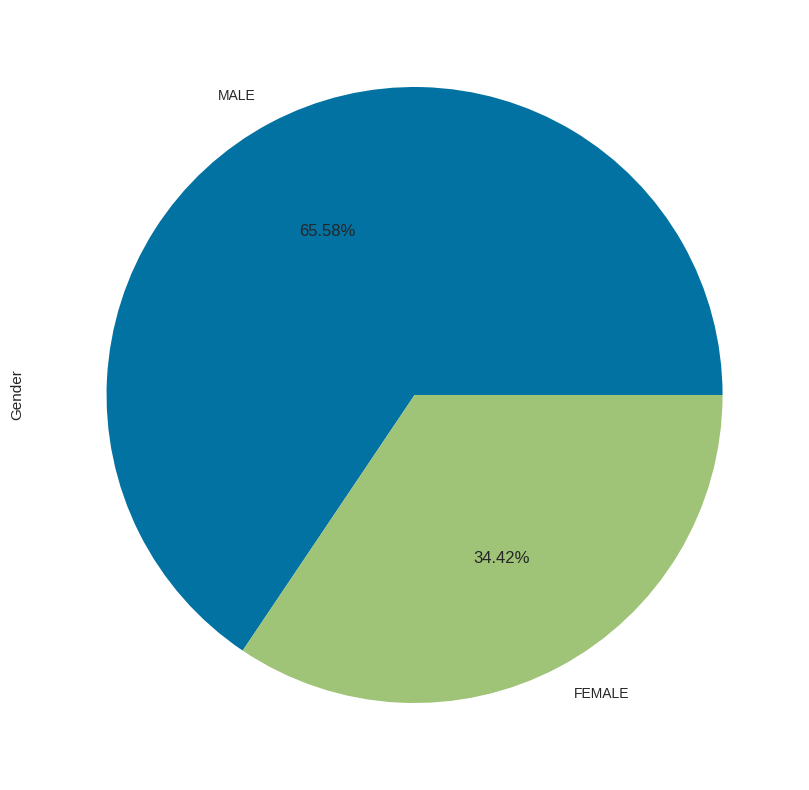

<Figure size 800x550 with 0 Axes>

In [16]:
# Gender Distribution

plt.figure(figsize=(15,10))
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()
plt.savefig('status.png')  # Exporting image

In the dataset, more individuals are Males at 65.58%

<Axes: title={'center': 'County Distribution'}>

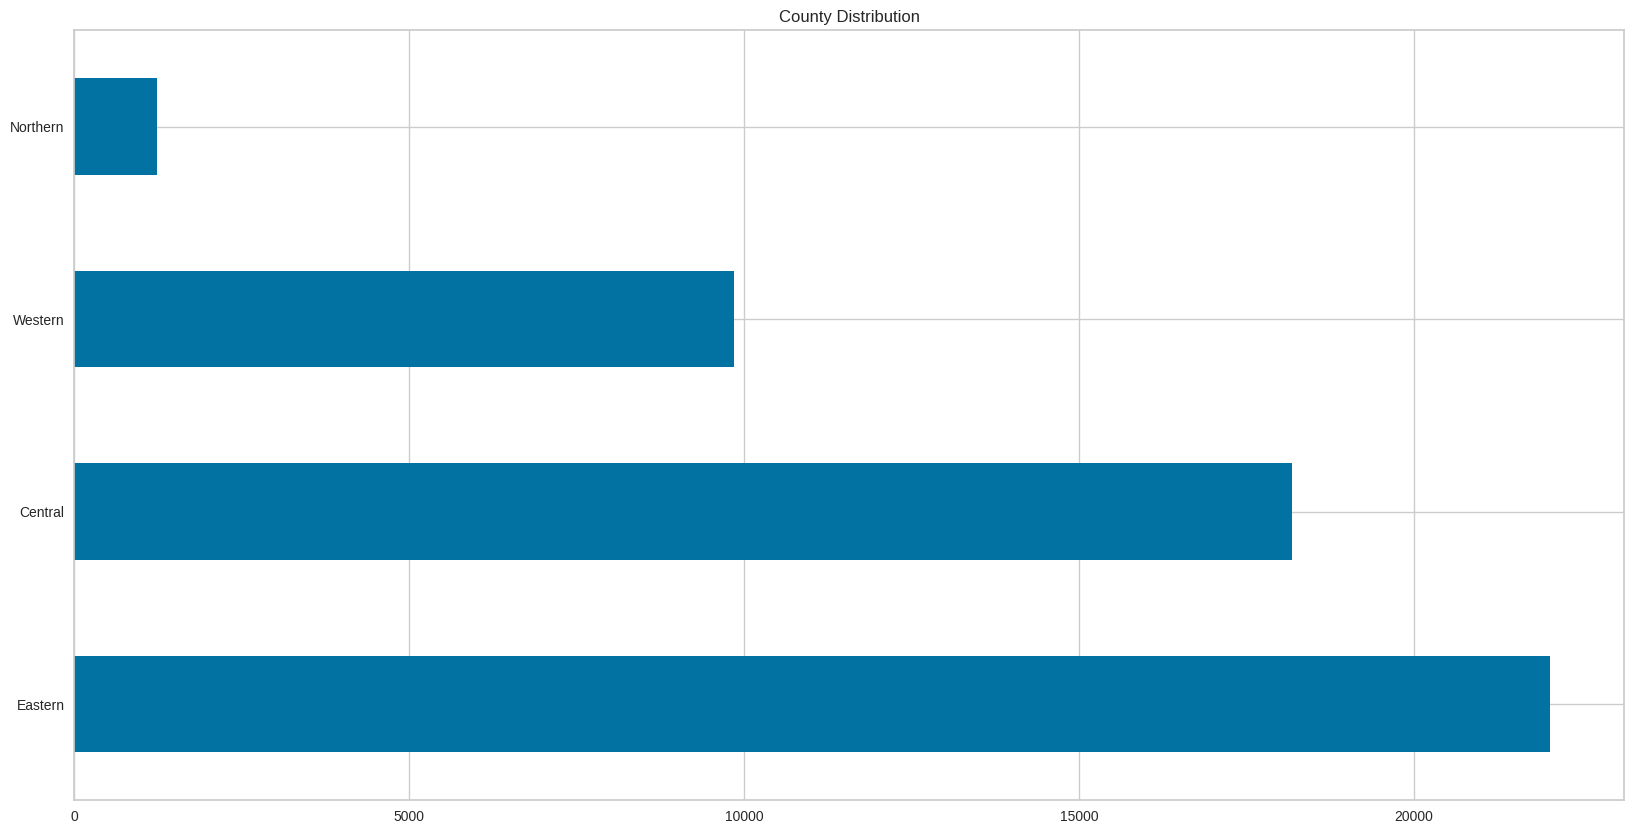

In [17]:
# County Distribution
df['County'].value_counts().head(30).plot(kind='barh', figsize=(20,10), title="County Distribution")

Majority of the individuals are coming from the Eastern region, with very few coming from the Northern region

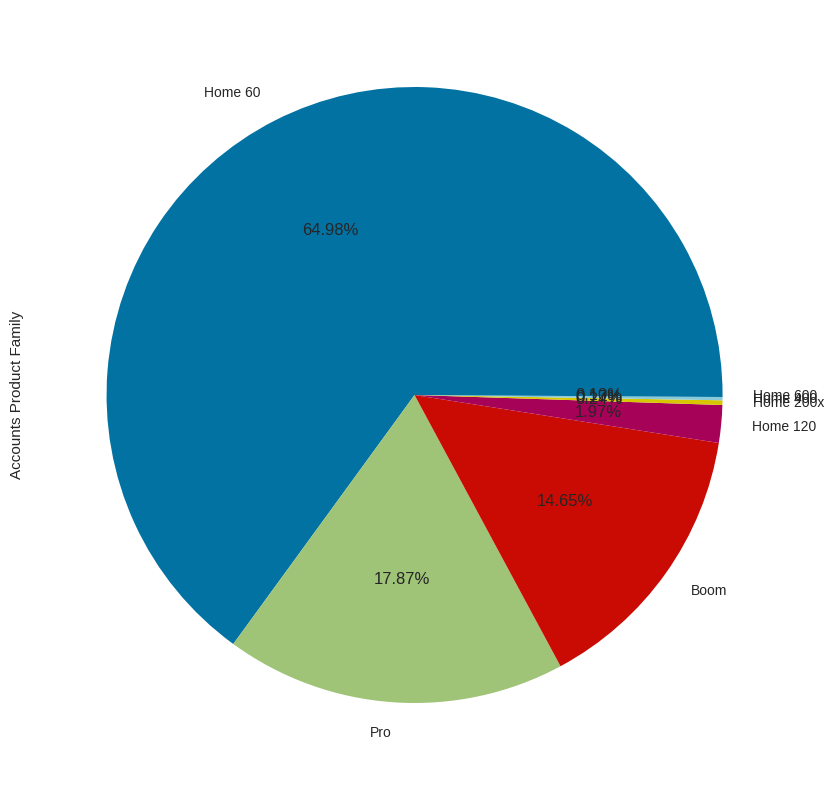

In [18]:
# Accounts Product Family Distribution
plt.figure(figsize=(15,10))
df['Accounts Product Family'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

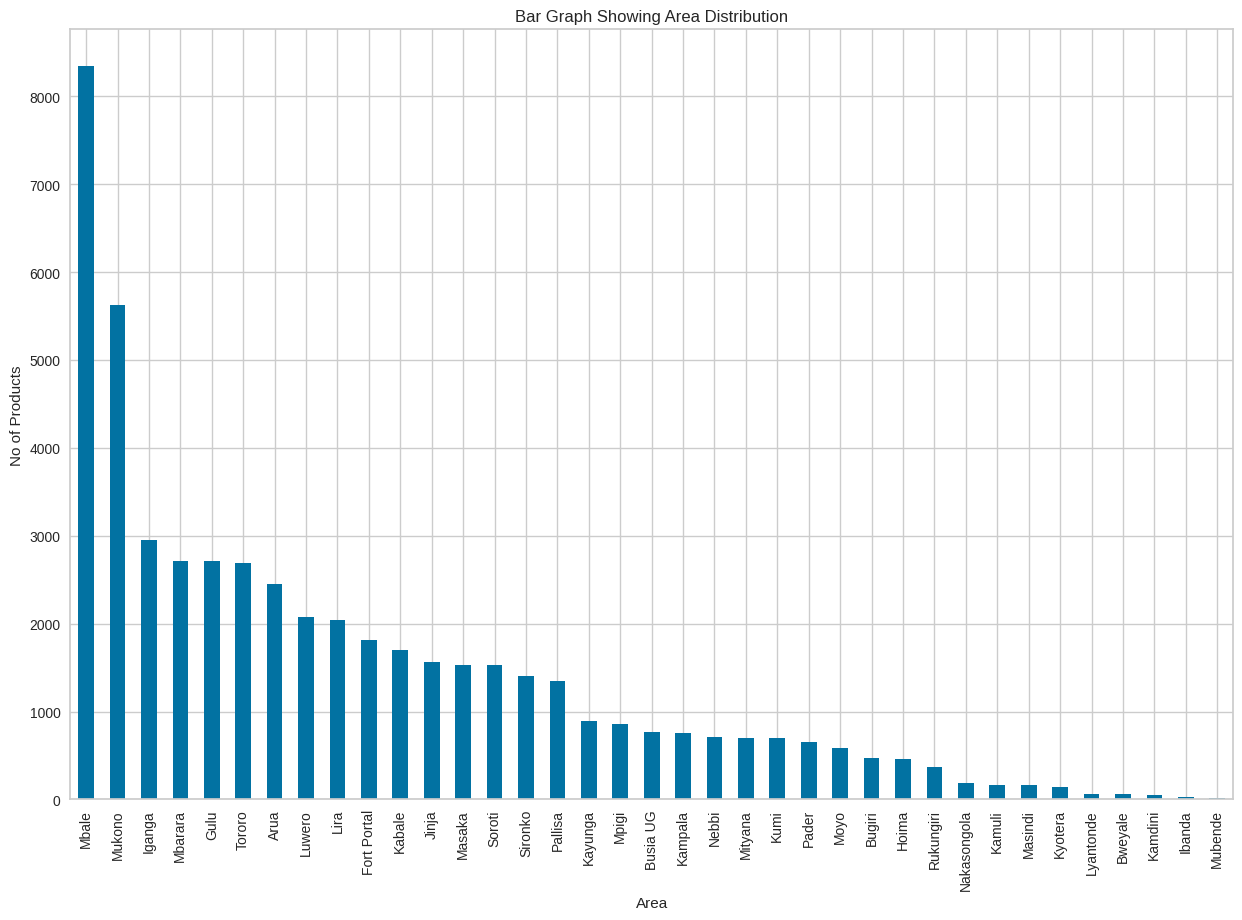

In [19]:
# Area Distribution

plt.figure(figsize=(15,10))
df["Area"].value_counts().plot.bar(title="Bar Graph Showing Area Distribution")
plt.ylabel('No of Products')
plt.xlabel('Area')
plt.savefig('are.png')  # Exporting image

Most of the individuals are coming from the districts of Mbale and Mukono.

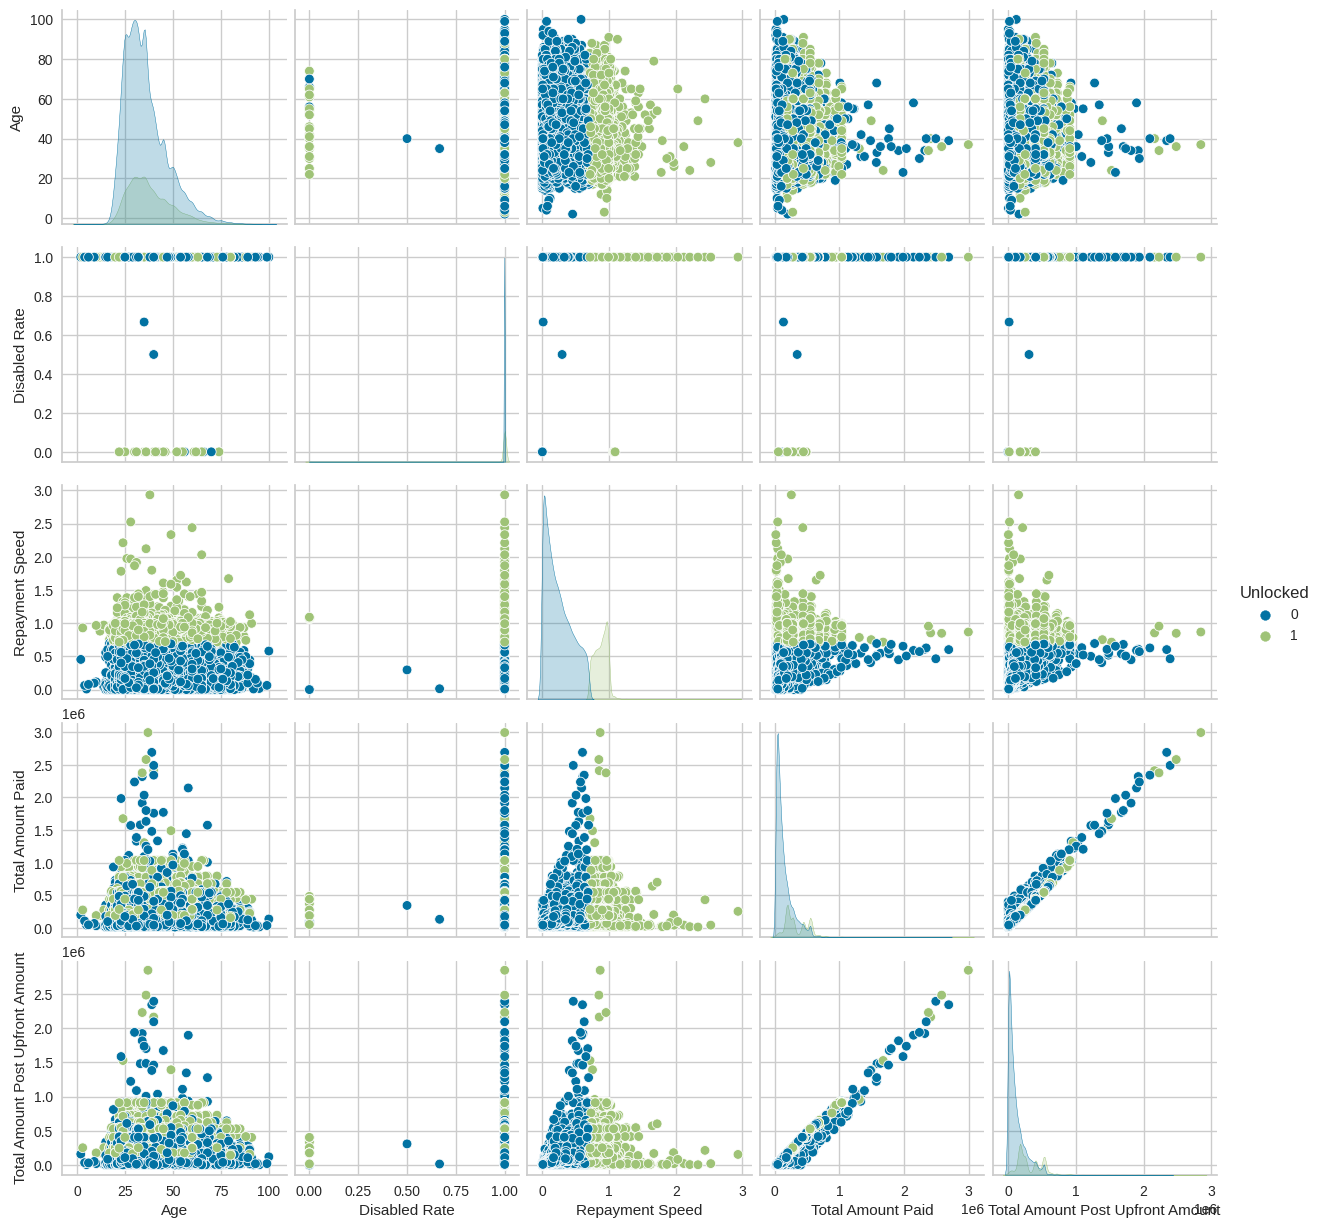

In [20]:
numerical_columns = [
    'Age', 'Disabled Rate', 'Repayment Speed', 'Total Amount Paid', 'Total Amount Post Upfront Amount'
]

# Create the pair plot with numerical columns
sns.pairplot(df, vars=numerical_columns, hue='Unlocked')

The scatter plots give us insights into the relationships and potential correlations between the numerical variables. For example, you can observe how variables like 'Age', 'Disabled Rate', 'Repayment Speed', 'Total Amount Paid', and 'Total Amount Post Upfront Amount' relate to each other and how they might impact the unlocking status ('Unlocked').

## Data Modelling

In [21]:
# Setting our source data source, with the target as disease. The model will be split on 80 training and 20 testing

try:
    clf = setup(data=df, target='Unlocked', train_size=0.8, fold_shuffle=True, session_id=2)
except AttributeError:
    pass

,Description,Value
0,Session id,2
1,Target,Unlocked
2,Target type,Binary
3,Original data shape,"(51317, 10)"
4,Transformed data shape,"(51317, 19)"
5,Transformed train set shape,"(41053, 19)"
6,Transformed test set shape,"(10264, 19)"
7,Ordinal features,1
8,Numeric features,5
9,Categorical features,4


In [22]:
# Finding the best model by sorting out the highest area under the curve (AUC)

compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4260
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.9050
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7920
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.2620
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.6560
lightgbm,Light Gradient Boosting Machine,0.9989,1.0000,0.9959,0.9984,0.9971,0.9964,0.9964,0.8120
et,Extra Trees Classifier,0.9916,0.9996,0.9742,0.9840,0.9790,0.9738,0.9738,3.3600
lda,Linear Discriminant Analysis,0.9691,0.9973,0.9797,0.8798,0.9271,0.9075,0.9096,0.7860
knn,K Neighbors Classifier,0.9315,0.9342,0.8165,0.8381,0.8271,0.7844,0.7845,2.4660
nb,Naive Bayes,0.8034,0.8459,0.4172,0.5128,0.4600,0.3414,0.3441,0.6820


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=2, splitter='best')

Decision Tree Classifier scores the highest at area under the curve (AUC) of 100%. I am choosing my best model on AUC because when AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.Equally all the metrices are 100% perfect.

## Model Building

In [23]:
# Model building using Decision Tree as the highest scoring model based on it having the highest Area under the curve and an accuracy of 100%

dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
# launch evaluate widget

evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Predict the model

In [25]:
# The test consists of remaining 20% of data that PyCaret automatically split on the setup, it's important to see that the model is not overfitting.

predict_model(dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,County,Area,Gender,Age,Accounts Product Family,Disabled Rate,Repayment Speed,Total Amount Paid,Total Amount Post Upfront Amount,Unlocked,prediction_label,prediction_score
23709,Central,Mukono,MALE,48.0,Home 60,1.0,0.5233,247250.0,228250.0,0,0,1.0
10943,Eastern,Gulu,FEMALE,40.0,Home 60,1.0,0.3720,278600.0,259600.0,0,0,1.0
50590,Eastern,Sironko,MALE,33.0,Home 60,1.0,0.1819,142985.0,123985.0,0,0,1.0
8562,Eastern,Soroti,FEMALE,21.0,Pro,1.0,0.0616,25200.0,10200.0,0,0,1.0
47228,Eastern,Pallisa,MALE,50.0,Home 60,1.0,0.8151,357000.0,338000.0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43149,Eastern,Lira,MALE,26.0,Home 60,1.0,0.0433,27000.0,8000.0,0,0,1.0
26424,Western,Kabale,FEMALE,40.0,Pro,1.0,0.0890,29700.0,14700.0,0,0,1.0
7538,Eastern,Mbale,MALE,67.0,Home 60,1.0,0.4076,313350.0,294350.0,0,0,1.0
22542,Western,Rukungiri,MALE,18.0,Home 60,1.0,0.6270,295800.0,255800.0,0,0,1.0


The model performs at 100% on all parameters on the unseen data

### Model Deployment file

In [26]:
try:
    save_model(dt, 'et_model_deployment_file')
except AttributeError:
    pass

Transformation Pipeline and Model Successfully Saved
